<a href="https://colab.research.google.com/github/thanga-v2/Transformers/blob/main/Tokenizers_and_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In pipeline, we use the model for inference / prediction.

same inference for all tasks.

breaking down the components of the pipeline

Tokenization, token to int mapping , padding.

**Pipelines** are composed of
Tokenizer and Models


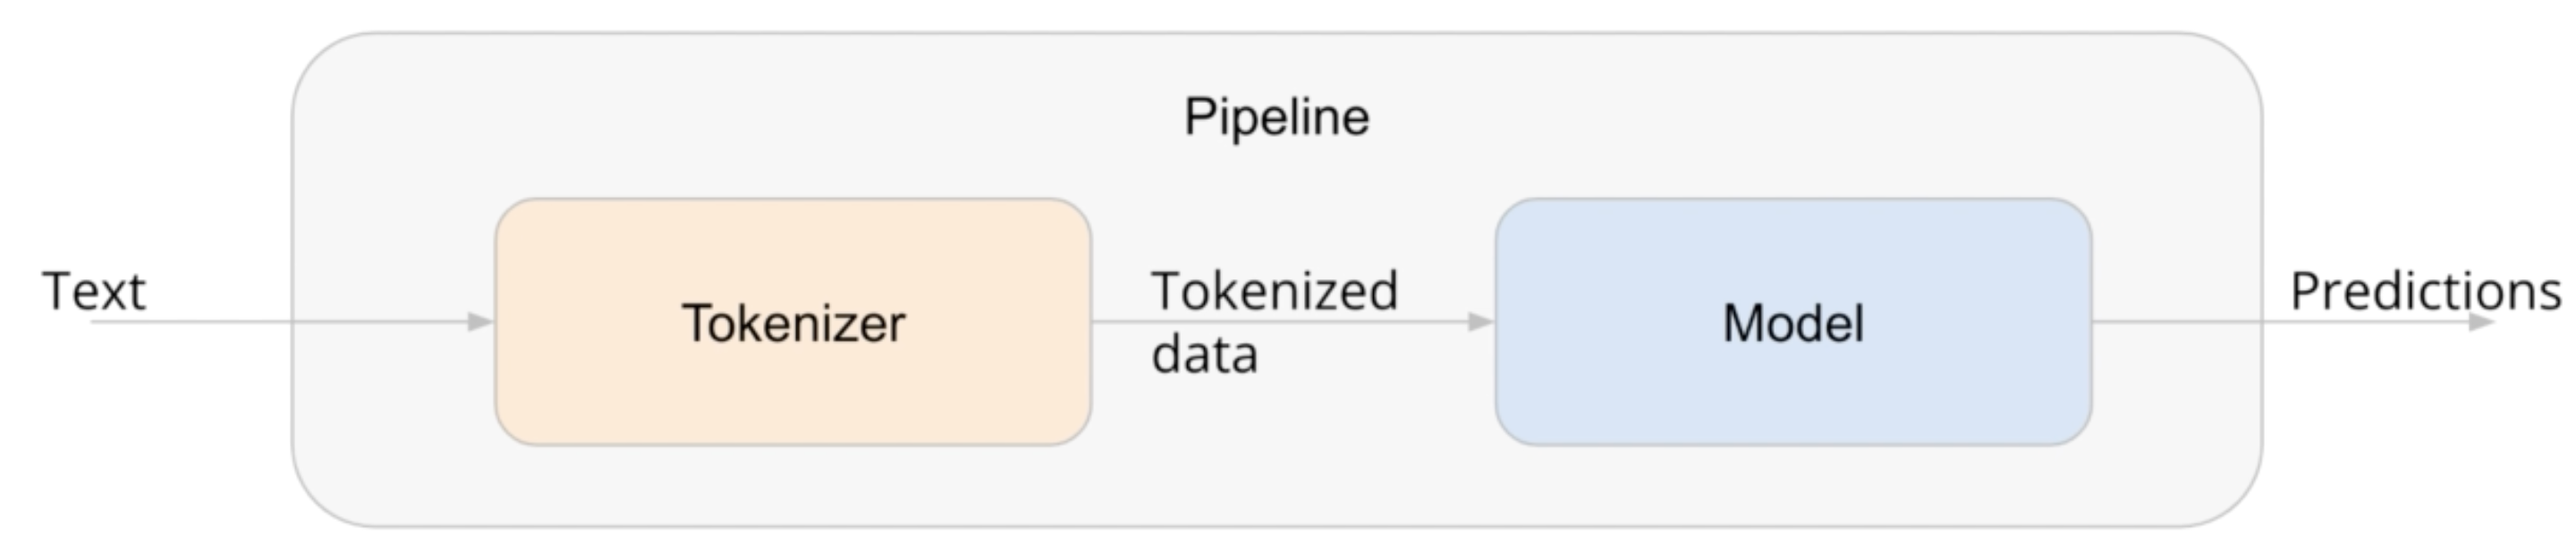




NLP borrowed a technique from computer vision which is to use pre trained
weights of large and powerfull models.

**Text Pre processing**

Docs -> Tokenize

Tokenizing a document can be of splitting a document into words, sub words, characters, punctuations.

Map tokens to sequence of Integers





In [62]:
# Autotokenizer will exactly give us the exact tokenizer object based on the check point we pass.

from transformers import AutoTokenizer

checkpoint = 'bert-base-cased'
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [63]:
type(tokenizer)

transformers.models.bert.tokenization_bert_fast.BertTokenizerFast

In [64]:
tokenizer("Hi Iam Thangaraj")

{'input_ids': [101, 8790, 146, 2312, 16062, 17582, 3361, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]}

**DistilBERT**

In [65]:
distilbert_tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

In [66]:
distilbert_tokenizer("Hi Iam Thangaraj")

{'input_ids': [101, 7632, 24264, 2213, 2084, 24864, 3501, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]}

In [67]:
gpt2_tokenizer = AutoTokenizer.from_pretrained('gpt2')

In [68]:
gpt2_tokenizer("Hi Iam Thangaraj")

{'input_ids': [17250, 314, 321, 536, 648, 283, 1228], 'attention_mask': [1, 1, 1, 1, 1, 1, 1]}

In [69]:
google_electra_tokenizer = AutoTokenizer.from_pretrained('google/electra-small-discriminator')

In [70]:
google_electra_tokenizer("Hi Iam Thangaraj")

{'input_ids': [101, 7632, 24264, 2213, 2084, 24864, 3501, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]}

In [71]:
bert_tokens = tokenizer.tokenize("Hi Iam Thangaraj")
token_id = tokenizer.convert_tokens_to_ids(bert_tokens)

print("Bert Tokens and Id's \n", bert_tokens, "\n", token_id)

Bert Tokens and Id's 
 ['Hi', 'I', '##am', 'Than', '##gara', '##j'] 
 [8790, 146, 2312, 16062, 17582, 3361]


In [72]:
distilbert_tokens = distilbert_tokenizer.tokenize("Hi Iam Thangaraj")
token_id = distilbert_tokenizer.convert_tokens_to_ids(distilbert_tokens)

print("distilBert Tokens and Id's \n", distilbert_tokens, "\n", token_id)

distilBert Tokens and Id's 
 ['hi', 'ia', '##m', 'than', '##gara', '##j'] 
 [7632, 24264, 2213, 2084, 24864, 3501]


In [73]:
gpt2_tokens = gpt2_tokenizer.tokenize("Hi Iam Thangaraj")
id = gpt2_tokenizer.convert_tokens_to_ids(gpt2_tokens)

print("GPT2 tokens and its Id's \n", gpt2_tokens, "\n", id)

GPT2 tokens and its Id's 
 ['Hi', 'ĠI', 'am', 'ĠTh', 'ang', 'ar', 'aj'] 
 [17250, 314, 321, 536, 648, 283, 1228]


**Converting back to tokens**

In [74]:
tokenizer.convert_ids_to_tokens([8790, 146, 2312, 16062, 17582, 3361])

['Hi', 'I', '##am', 'Than', '##gara', '##j']

Or

In [75]:
tokenizer.decode([8790, 146, 2312, 16062, 17582, 3361])

'Hi Iam Thangaraj'

In [76]:
data = tokenizer.encode(' Hi Iam encoding this text, so that th text will get converted to vVectors / Integers forthe understanding of machines / Neural networks')

In [77]:
data

[101,
 8790,
 146,
 2312,
 18922,
 1142,
 3087,
 117,
 1177,
 1115,
 24438,
 3087,
 1209,
 1243,
 4213,
 1106,
 191,
 2559,
 20302,
 1116,
 120,
 1130,
 1566,
 9915,
 5275,
 1162,
 4287,
 1104,
 6555,
 120,
 151,
 8816,
 1348,
 6379,
 102]

In [78]:
decode_data = tokenizer.decode(data)
decode_data

'[CLS] Hi Iam encoding this text, so that th text will get converted to vVectors / Integers forthe understanding of machines / Neural networks [SEP]'

In [79]:
# On Pytorch

tokenizer.tokenize("Testing in pytorch", return_tensors='pt')

['Testing', 'in', 'p', '##yt', '##or', '##ch']

In [80]:
tokenizer.tokenize("Testing in pytorch")

['Testing', 'in', 'p', '##yt', '##or', '##ch']

In [81]:
data = [
    "testing",
    "in",
    "pytorch",
]

In [82]:
tokenizer.tokenize(data)

TypeError: TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]

In [86]:
# padding and truncations

# input sequences should have of same length

model_inputs = tokenizer(data, padding=True, truncation=True)
model_inputs

{'input_ids': [[101, 5193, 102, 0, 0, 0], [101, 1107, 102, 0, 0, 0], [101, 185, 25669, 1766, 1732, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 0, 0, 0], [1, 1, 1, 0, 0, 0], [1, 1, 1, 1, 1, 1]]}

In [87]:
# padding and truncations

# input sequences should have of same length

tensor_inputs = tokenizer(data, padding=True, truncation=True, return_tensors='pt')
tensor_inputs

{'input_ids': tensor([[  101,  5193,   102,     0,     0,     0],
        [  101,  1107,   102,     0,     0,     0],
        [  101,   185, 25669,  1766,  1732,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 0, 0, 0],
        [1, 1, 1, 0, 0, 0],
        [1, 1, 1, 1, 1, 1]])}

attention mask tells the model where it should pay attention to

'attention_mask': tensor([[1, 1, 1, 0, 0, 0],
        [1, 1, 1, 0, 0, 0],
        [1, 1, 1, 1, 1, 1]])

        0 - will ignore the tokens
        

Model Outputs


Pytorch - Classifier with K class

we will be getting a pytorch tensors with k predictions

In [89]:
bert_tokens = tokenizer.tokenize("hello world")
token_id = tokenizer.convert_tokens_to_ids(bert_tokens)

print("Bert Tokens and Id's \n", bert_tokens, "\n", token_id)

Bert Tokens and Id's 
 ['hello', 'world'] 
 [19082, 1362]


In [91]:
tokenizer.convert_ids_to_tokens(token_id)

['hello', 'world']

In [92]:
tokenizer.decode(token_id)

'hello world'

    encode() - adds the special sncode [CLS] [SEP]

In [94]:
hello = "hello thanga"
tokenizer.encode(hello)

[101, 19082, 1190, 2571, 102]

In [103]:
tokenizer.tokenize(hello)

['hello', 'than', '##ga']

In [105]:
tokenizer.convert_ids_to_tokens([101, 19082, 1190, 2571, 102])

['[CLS]', 'hello', 'than', '##ga', '[SEP]']

In [101]:
tokenizer.decode([101, 19082, 1190, 2571, 102])

'[CLS] hello thanga [SEP]'

In [109]:
tokenizer("hi hello test")

{'input_ids': [101, 20844, 19082, 2774, 102], 'token_type_ids': [0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1]}

In [110]:
model_input = tokenizer("this is my model input")
model_input

{'input_ids': [101, 1142, 1110, 1139, 2235, 7758, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1]}

In [111]:
from transformers import AutoModelForSequenceClassification

In [113]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [114]:
outputs = model(**model_input)

AttributeError: 'list' object has no attribute 'size'

Hugging face models, are by default pytorch models, hence model accepts torch tensors


In [115]:
model_tensor_inputs = tokenizer("hello thanga im here", return_tensors='pt')

In [116]:
model_tensor_inputs

{'input_ids': tensor([[  101, 19082,  1190,  2571, 13280,  1303,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1]])}

In [117]:
outputs = model(**model_tensor_inputs)

In [118]:
outputs

SequenceClassifierOutput(loss=None, logits=tensor([[0.4701, 0.4417]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

Creating a new model with 3 Outputs

In [119]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=3)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [120]:
outputs = model(**model_tensor_inputs)
outputs

SequenceClassifierOutput(loss=None, logits=tensor([[-0.6766,  0.0142,  0.2717]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [121]:
outputs.logits

tensor([[-0.6766,  0.0142,  0.2717]], grad_fn=<AddmmBackward0>)

In [122]:
outputs['logits']

tensor([[-0.6766,  0.0142,  0.2717]], grad_fn=<AddmmBackward0>)

In [123]:
outputs[0]

tensor([[-0.6766,  0.0142,  0.2717]], grad_fn=<AddmmBackward0>)

In [124]:
# torch tensors to numpy array

outputs.logits.detach().cpu().numpy()

array([[-0.67659426,  0.01415598,  0.27172992]], dtype=float32)

In [127]:
data = [
    "hi iam thangarajfrom chennai",
    "wie heissen sie?",
    "wie get us ihne?",
]

In [128]:
model_inputs = tokenizer(data, return_tensors='pt')

ValueError: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).

In [129]:
model_inputs = tokenizer(data,
                         padding = True,
                         truncation = True,
                         return_tensors='pt')

In [130]:
model_inputs

{'input_ids': tensor([[  101, 20844,   178,  2312,  1190, 17582,  3361,  2087, 16071, 22572,
          1424, 26727,   102],
        [  101,   192,  1663,  1119, 19202,  1179, 27466,  1162,   136,   102,
             0,     0,     0],
        [  101,   192,  1663,  1243,  1366,   178,  7272,  1162,   136,   102,
             0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]])}

In [131]:
model_inputs['input_ids']

tensor([[  101, 20844,   178,  2312,  1190, 17582,  3361,  2087, 16071, 22572,
          1424, 26727,   102],
        [  101,   192,  1663,  1119, 19202,  1179, 27466,  1162,   136,   102,
             0,     0,     0],
        [  101,   192,  1663,  1243,  1366,   178,  7272,  1162,   136,   102,
             0,     0,     0]])

In [132]:
model_inputs['attention_mask']

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]])

In [133]:
model(**model_inputs)

SequenceClassifierOutput(loss=None, logits=tensor([[-0.6505,  0.1087,  0.2586],
        [-0.7073,  0.0078,  0.2935],
        [-0.7594,  0.0368,  0.3014]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)